<a href="https://colab.research.google.com/github/angelolmg/aprendizagem-maquina/blob/main/4_Backpropagation_e_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem de máquina e mineração de dados (11/04/24)
### Backpropagation, MNIST, LeNet

## 1. Backpropagation em uma rede perceptron simples

Baseado:  
[Building a neural network FROM SCRATCH (no Tensorflow/Pytorch, just numpy & math)](https://www.youtube.com/watch?v=w8yWXqWQYmU)   
[Simple MNIST NN from scratch (numpy, no TF/Keras)](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook) por Samson Zhang

---

Relembrando a estrutura de um neurônio:

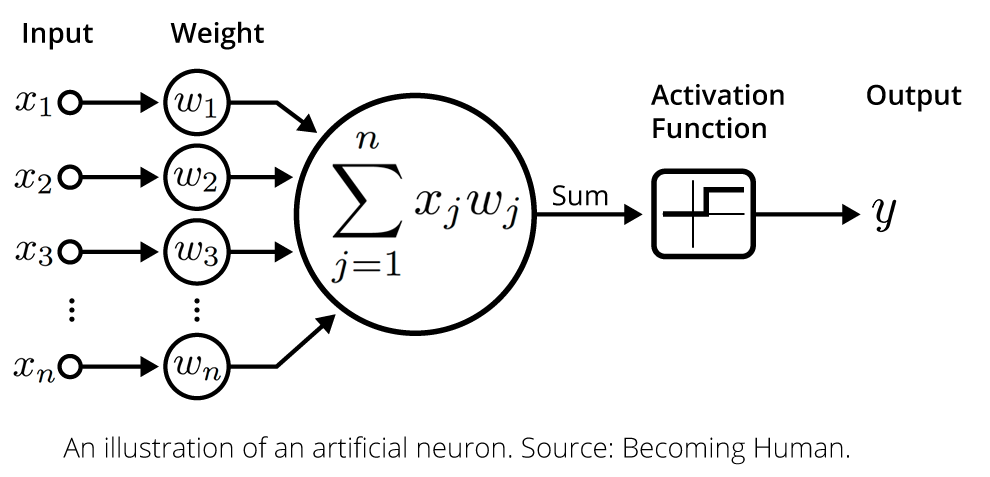

Vamos entender como funcionaria o algoritmo de retro propagação em um perceptron simples com **uma camada oculta**:

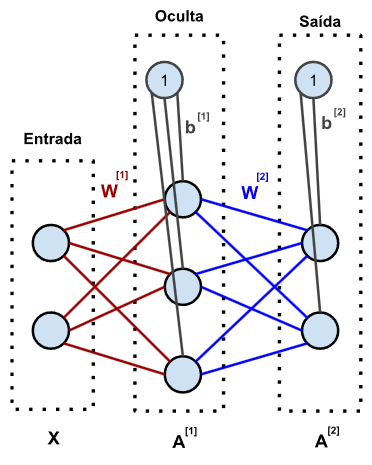

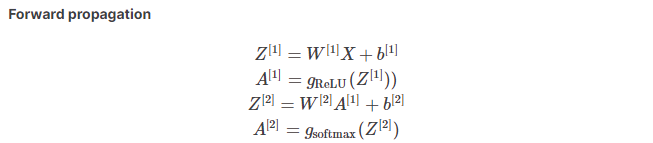

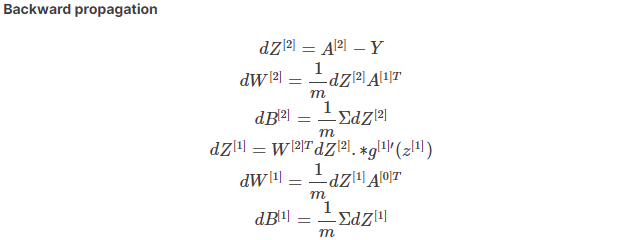

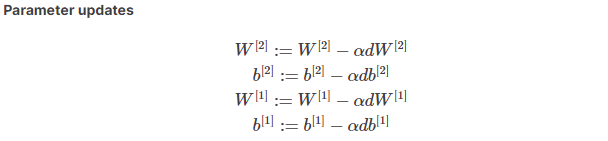

Algum código para deixar mais claro as operações:

Código completo em ["Simple MNIST NN from scratch (numpy, no TF/Keras)"](https://www.kaggle.com/code/wwsalmon/simple-mnist-nn-from-scratch-numpy-no-tf-keras/notebook) por Samson Zhang


In [1]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

De maneira bem direta, a "descida gradiente" em direção aos pesos e viéses ideias seria apenas um laço de três ações principais: **propagação para frente -> retro propagação -> atualização de parâmetros**.

Esse ciclo continua até um numero pré-definido de iterações ou outro critério de parada.

In [ ]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)

Neste caso como estamos passando **todos os exemplos de uma vez** ($X$) **para atualizar os parâmetros uma única vez**, é que chamamos de "descida gradiente em lote" ou "*batch gradient descent*":

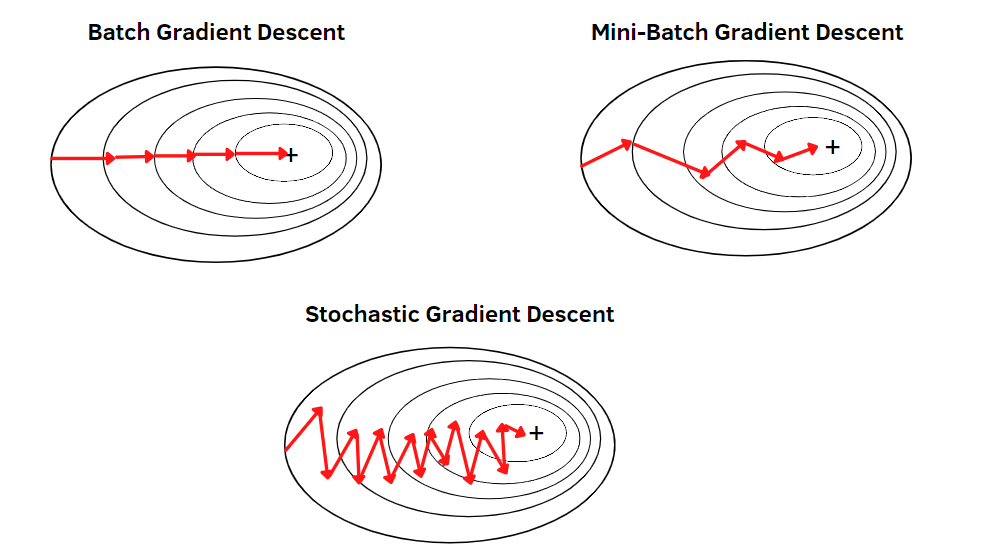

Usando sklearn: classificação com MLP

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data
y = iris.target

# Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pré-processamento dos dados (normalização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir e treinar o modelo MLP
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Avaliar o modelo
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo MLP:", accuracy)


Acurácia do modelo MLP: 1.0


## 2. Intro ao Deep learning: dataset MNIST



> "The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems."



Número total de imagens no conjunto de treinamento: 60000
Número total de imagens no conjunto de teste: 10000
Formato de uma imagem: torch.Size([1, 28, 28])


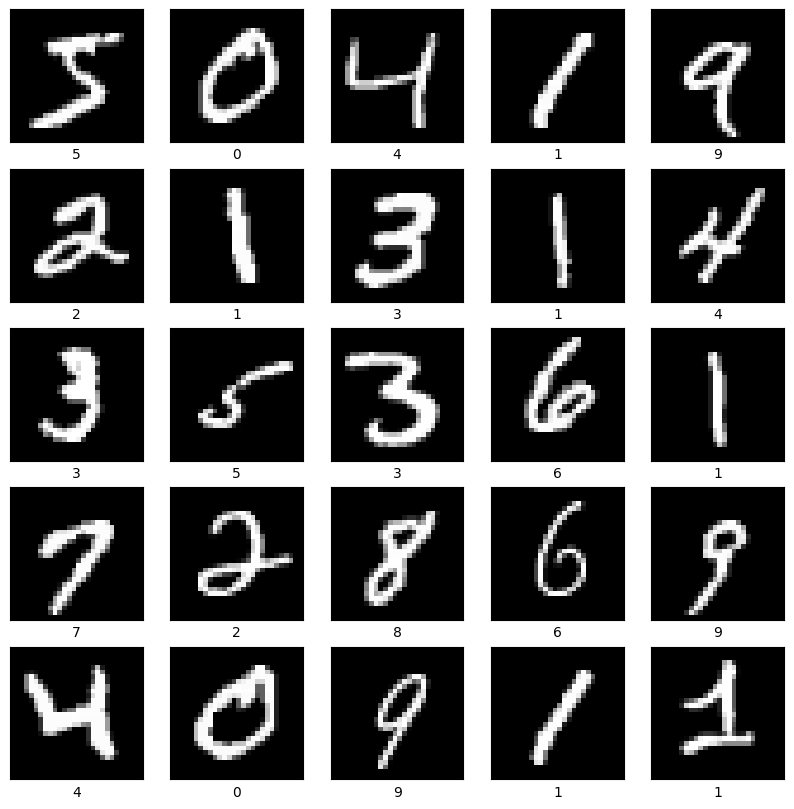

In [ ]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Carregar o conjunto de dados MNIST
transform = transforms.ToTensor()
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Informações sobre o conjunto de dados
print("Número total de imagens no conjunto de treinamento:", len(mnist_trainset))
print("Número total de imagens no conjunto de teste:", len(mnist_testset))
print("Formato de uma imagem:", mnist_trainset[0][0].shape)

# Visualizar algumas amostras do conjunto de dados MNIST
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    image, label = mnist_trainset[i]
    plt.imshow(image.squeeze().numpy(), cmap='gray')
    plt.xlabel(label)
plt.show()


## 3. Intro ao Deep learning: um exemplo de rede convolucional (LeNet)



> "Yann LeCun e outros criaram a forma inicial do LeNet em 1989. O artigo *Backpropagation Applied to Handwritten Zip Code Recognition* demonstra como tais restrições podem ser integradas em uma rede de retropropagação através da arquitetura da rede. **E foi aplicado com sucesso no reconhecimento de dígitos de códigos postais escritos à mão fornecidos pelo Serviço Postal dos Estados Unidos**." [Fonte](https://en.wikipedia.org/wiki/LeNet#Application)



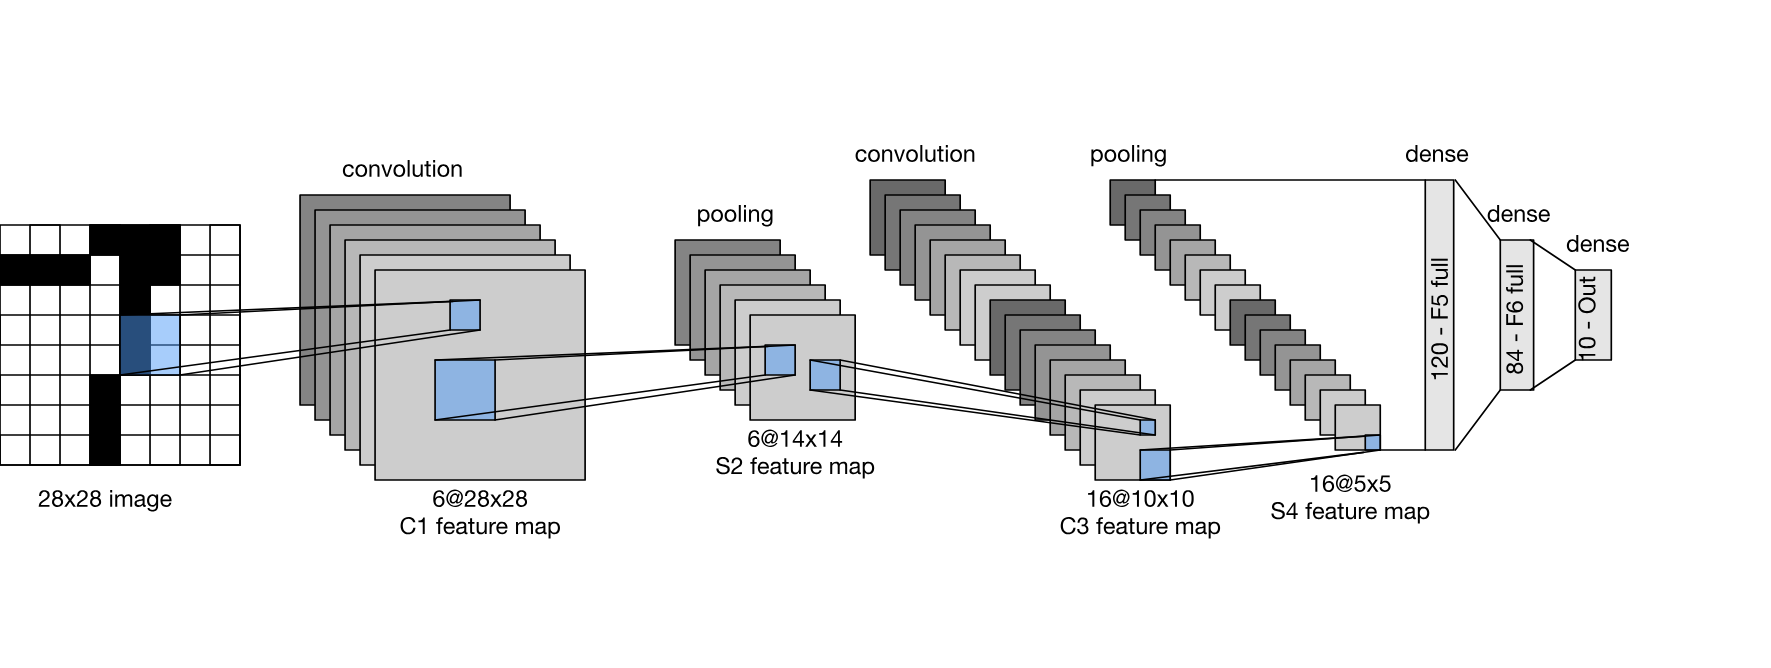

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Definindo a arquitetura LeNet
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # flatten all dimensions except batch
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Carregando o conjunto de dados MNIST e realizando transformações
# O conjunto de dados MNIST já vem com média e desvio padrão predefinidos, que são 0.1307 e 0.3081, respectivamente
# Ao normalizar os valores dos pixels, estamos ajustando-os para ter uma média de zero e um desvio padrão de um
# Isso ajuda a estabilizar o processo de treinamento, facilitando a convergência da rede neural
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Instanciando o modelo LeNet
net = LeNet()

# Definindo a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

# Treinando o modelo
for epoch in range(5):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            running_loss = 0.0

print('Finished Training')

# Testando o modelo
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


100%|██████████| 9912422/9912422 [00:00<00:00, 71879060.68it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 60994810.59it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 16635255.93it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2112500.42it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



[1,   100] loss: 0.954
[1,   200] loss: 0.287
[1,   300] loss: 0.203
[1,   400] loss: 0.155
[1,   500] loss: 0.144
[1,   600] loss: 0.105
[1,   700] loss: 0.113
[1,   800] loss: 0.110
[1,   900] loss: 0.091
[2,   100] loss: 0.075
[2,   200] loss: 0.082
[2,   300] loss: 0.073
[2,   400] loss: 0.068
[2,   500] loss: 0.071
[2,   600] loss: 0.065
[2,   700] loss: 0.070
[2,   800] loss: 0.058
[2,   900] loss: 0.061
[3,   100] loss: 0.048
[3,   200] loss: 0.056
[3,   300] loss: 0.051
[3,   400] loss: 0.053
[3,   500] loss: 0.052
[3,   600] loss: 0.053
[3,   700] loss: 0.050
[3,   800] loss: 0.048
[3,   900] loss: 0.057
[4,   100] loss: 0.041
[4,   200] loss: 0.038
[4,   300] loss: 0.038
[4,   400] loss: 0.039
[4,   500] loss: 0.042
[4,   600] loss: 0.041
[4,   700] loss: 0.037
[4,   800] loss: 0.046
[4,   900] loss: 0.041
[5,   100] loss: 0.030
[5,   200] loss: 0.035
[5,   300] loss: 0.024
[5,   400] loss: 0.045
[5,   500] loss: 0.033
[5,   600] loss: 0.032
[5,   700] loss: 0.037
[5,   800] 

## Links úteis

### a. Pycaret

In [3]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.2 MB

In [4]:
from pycaret.datasets import get_data
from pycaret.classification import *

# Carregar um conjunto de dados de exemplo (Iris)
data = get_data('iris')

# Configurar o ambiente do PyCaret
exp_clf = setup(data, target='species')

# Comparar diferentes modelos e selecionar o melhor
best_model = compare_models()

# Avaliar o modelo selecionado
evaluate_model(best_model)

# Finalizar o modelo
final_model = finalize_model(best_model)

# Fazer previsões em novos dados
predictions = predict_model(final_model, data=data)

# Exibir as previsões
print(predictions.head())


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


,Description,Value
0,Session id,2935
1,Target,species
2,Target type,Multiclass
3,Target mapping,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original data shape,"(150, 5)"
5,Transformed data shape,"(150, 5)"
6,Transformed train set shape,"(105, 5)"
7,Transformed test set shape,"(45, 5)"
8,Numeric features,4
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9627,0.0000,0.9627,0.9707,0.9620,0.9436,0.9482,0.0340
knn,K Neighbors Classifier,0.9527,0.0000,0.9527,0.9582,0.9523,0.9284,0.9317,0.0440
nb,Naive Bayes,0.9527,0.0000,0.9527,0.9545,0.9526,0.9284,0.9295,0.0360
qda,Quadratic Discriminant Analysis,0.9518,0.0000,0.9518,0.9630,0.9507,0.9270,0.9332,0.0350
rf,Random Forest Classifier,0.9436,0.0000,0.9436,0.9473,0.9433,0.9147,0.9169,0.1860
et,Extra Trees Classifier,0.9436,0.0000,0.9436,0.9473,0.9433,0.9147,0.9169,0.1420
lr,Logistic Regression,0.9427,0.0000,0.9427,0.9445,0.9417,0.9133,0.9152,0.7410
dt,Decision Tree Classifier,0.9427,0.0000,0.9427,0.9470,0.9423,0.9133,0.9157,0.0320
ada,Ada Boost Classifier,0.9345,0.0000,0.9345,0.9364,0.9344,0.9009,0.9020,0.1160
gbc,Gradient Boosting Classifier,0.9345,0.0000,0.9345,0.9400,0.9341,0.9009,0.9042,0.4200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9800,0.9992,0.9800,0.9801,0.9800,0.9700,0.9701


   sepal_length  sepal_width  petal_length  petal_width      species  \
0           5.1          3.5           1.4          0.2  Iris-setosa   
1           4.9          3.0           1.4          0.2  Iris-setosa   
2           4.7          3.2           1.3          0.2  Iris-setosa   
3           4.6          3.1           1.5          0.2  Iris-setosa   
4           5.0          3.6           1.4          0.2  Iris-setosa   

  prediction_label  prediction_score  
0      Iris-setosa               1.0  
1      Iris-setosa               1.0  
2      Iris-setosa               1.0  
3      Iris-setosa               1.0  
4      Iris-setosa               1.0  


### b. Quais são os modelos estado-da-arte?

https://paperswithcode.com/sota